<a href="https://colab.research.google.com/github/sumayabai/Rented-Bike-sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_ipynb_(_Final_Team).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


About the dataset: 

 Here, we have dataset about the rented bike counts alog with several other factors like temperature, wind, snow, rain and many more. We have to make a  predictions on the rented bike count to ensure smooth availability of rented bikes per hour and to make sure we do not end up getting more or less supply of bikes than required.

In [ ]:
# Importing the dataset
# df = pd.read_csv('/content/drive/My Drive/Capstone2/SeoulBikeData.csv',encoding= 'unicode_escape')
df = pd.read_csv('//content/drive/MyDrive/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv',encoding= 'unicode_escape')
#ayush
#df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv',encoding='latin1')


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0     01/12/2017                254     0  ...   Winter  No Holiday              Yes
1     01/12/2017                204     1  ...   Winter  No Holiday              Yes
2     01/12/2017                173     2  ...   Winter  No Holiday              Yes
3     01/12/2017                107     3  ...   Winter  No Holiday              Yes
4     01/12/2017                 78     4  ...   Winter  No Holiday              Yes
...          ...                ...   ...  ...      ...         ...              ...
8755  30/11/2018               1003    19  ...   Autumn  No Holiday              Yes
8756  30/11/2018                764    20  ...   Autumn  No Holiday              Yes
8757  30/11/2018                694    21  ...   Autumn  No Holiday              Yes
8758  30/11/2018                712    22  ...   Autumn  No Holiday              Yes
8759  30/11/2018                5

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#no duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape) 

(0, 14)


In [ ]:
#null value imputation :
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#strip the date to get the year and month
import datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]


0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['day'] = df['Date'].dt.day


# Exploratory Data Analysis

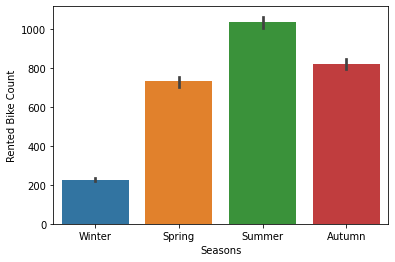

In [ ]:
# plotting seasons against count of rented bikes
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = df)

we can see from the above graph that,summer season seems to be the month where count of rented bike are at peak.

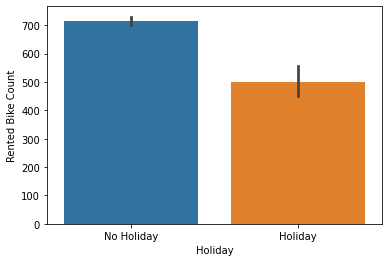

In [ ]:
# plotting Holiday against count of rented bikes
sns.barplot(x = 'Holiday', y = 'Rented Bike Count', data = df)

It can infereed from the above graph that,rented bikes where more in demand during working days .

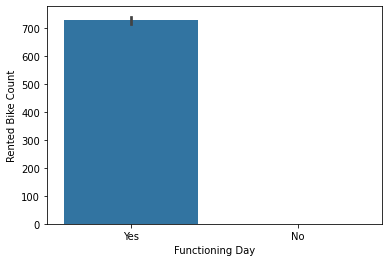

In [ ]:
# plotting Functioning Day against count of rented bikes
sns.barplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)

Text(0, 0.5, 'Count')

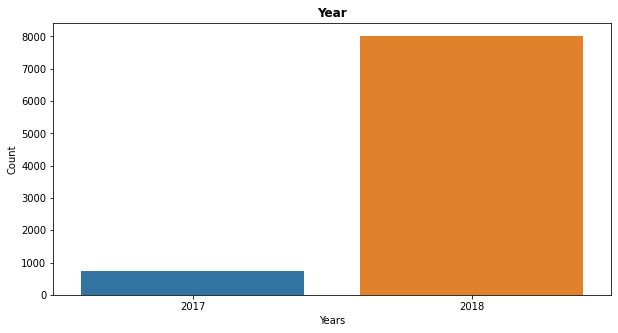

In [ ]:
#which year had more rents

plt.figure(figsize=(10,5))
ax = sns.countplot(x="year", data=df)
plt.title('Year',weight='bold')
plt.xlabel('Years')
plt.ylabel('Count')

Our dataset gives information for 2 years and it is clear from the graph that bike count increased in the year 2018.

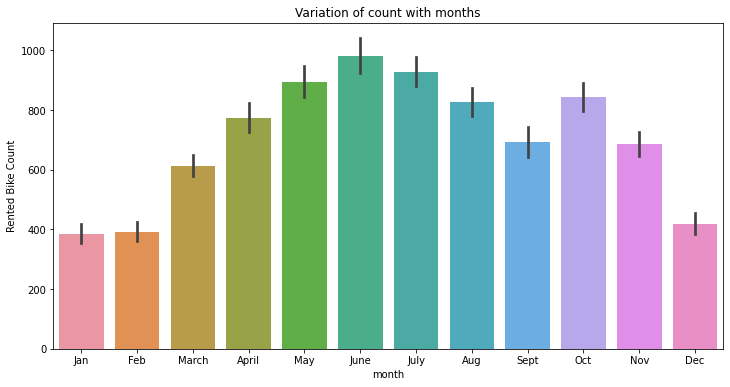

In [ ]:
#month 
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='Rented Bike Count', data=df)
ax.set_title('Variation of count with months')

tick_val=[0,1 , 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

The peak month for rented bikes are june.

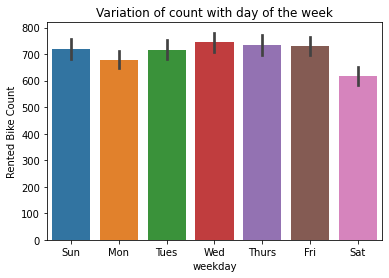

In [ ]:

#weekday
ax = sns.barplot(x="weekday",y='Rented Bike Count',data=df)
ax.set_title('Variation of count with day of the week')
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plt.xticks(tick_val, tick_lab)
plt.show()

Surprisingly all days in the week had more or less similar demand for the rented bikes.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

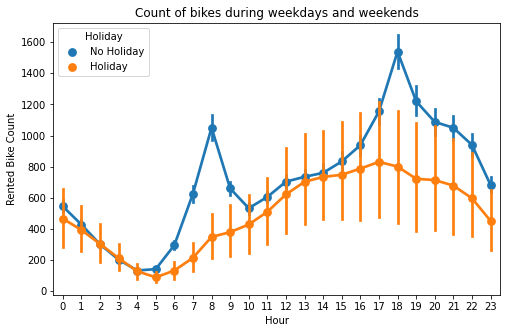

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

* During working days there is a high demand around the 7th hour and 17th hour. There is a lower demand during 0 to 5th hour and 10 to 14th hour.
* During non workin days there is a high demand during 10 to 14th hour. There is a lower demand around the 7th hour. 

[Text(0.5, 1.0, 'Count of bikes during Functioning and Non Functioning Day')]

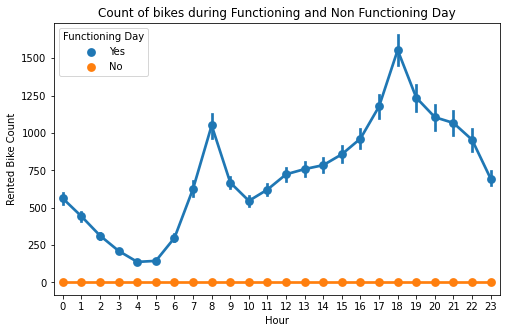

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Functioning Day',ax=ax)
ax.set(title='Count of bikes during Functioning and Non Functioning Day')

[Text(0.5, 1.0, 'Count of bikes during Season')]

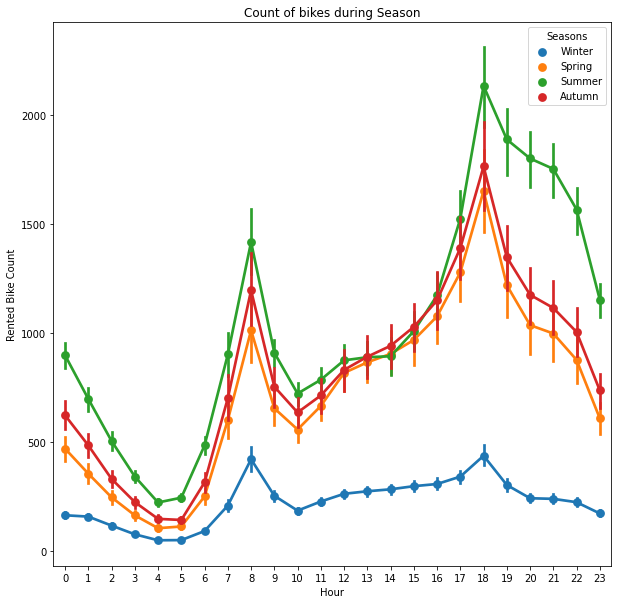

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons',ax=ax)
ax.set(title='Count of bikes during Season')

[Text(0.5, 1.0, 'Realation between humidity and users')]

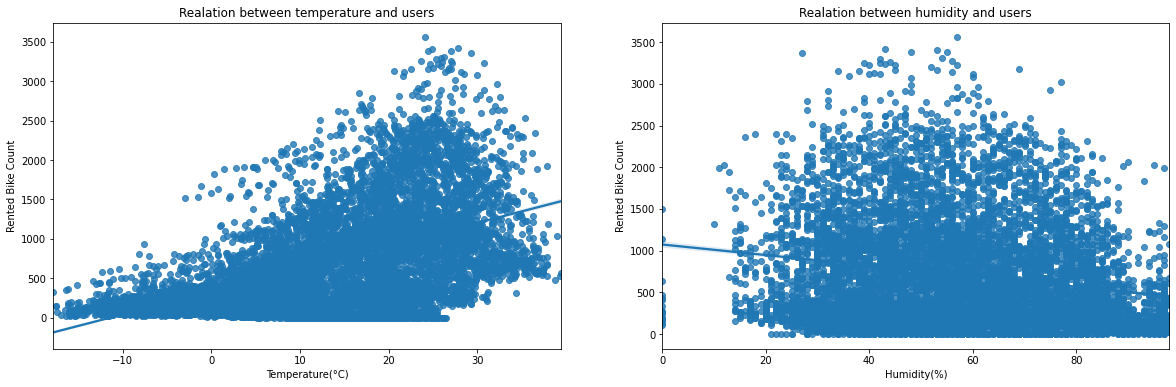

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=df["Temperature(°C)"], y=df["Rented Bike Count"],ax=ax1)
ax1.set(title="Realation between temperature and users")
sns.regplot(x=df["Humidity(%)"], y=df["Rented Bike Count"],ax=ax2)
ax2.set(title="Realation between humidity and users")

The  chart shows us the graph of total bike rides acc to hours and seasons, and it seems quite clear that after 6pm the bike rides are suddenly at peak.

Seasons  Autumn  Spring  Summer  Winter
Hour                                   
0         56755   43298   82714   14866
1         44200   32755   64287   14315
2         30198   22767   46529   10601
3         20524   15163   31526    7003
4         13522    9740   20591    4543
5         13073   10456   22626    4610
6         28759   23151   44697    8354
7         63899   55376   83056   18861
8        108948   93274  130511   37998
9         68723   60335   83812   22914
10        57937   51380   66562   16776
11        65039   61332   72391   20549
12        75706   75274   80589   23727
13        81216   79748   81898   24773
14        85765   83310   82310   25586
15        93693   89188   92894   26878
16       104750   99131  108024   27772
17       126593  117718  140419   30826
18       160650  152038  196433   39447
19       122761  112294  173811   27363
20       107058   95446  165777   21891
21       101559   91901  161374   21645
22        91547   80768  144244   20262


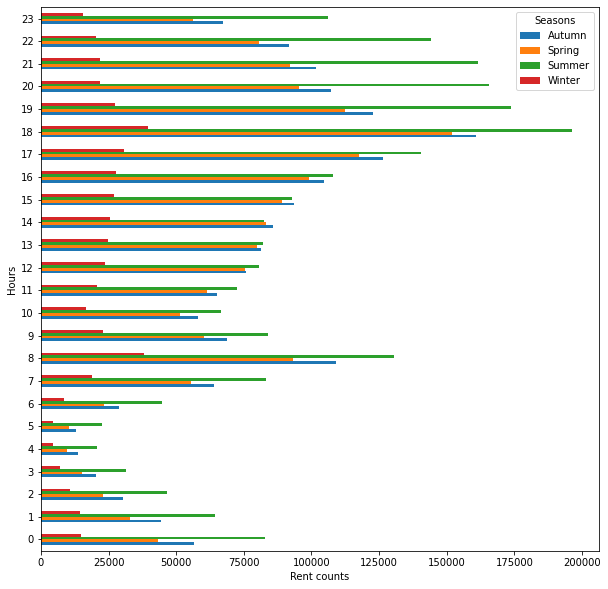

Seasons,Autumn,Spring,Summer,Winter
Hour,,,,
0,56755,43298,82714,14866
1,44200,32755,64287,14315
2,30198,22767,46529,10601
3,20524,15163,31526,7003
4,13522,9740,20591,4543
5,13073,10456,22626,4610
6,28759,23151,44697,8354
7,63899,55376,83056,18861
8,108948,93274,130511,37998


In [ ]:
# hours acc to seasons
pvt = pd.pivot_table(df,columns = 'Seasons', index = 'Hour', aggfunc='sum', values='Rented Bike Count' )
print(pvt)

ax = pvt.plot(kind = 'barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Rent counts")
ax.set_ylabel("Hours")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
pvt

Here, we get insights about the rented bike counts per month according to year, and we have much higher bike counts in 2018 as compared to the counts in 2017.We are having a prosperous growth.

year     2017    2018
month                
1        9539  277705
2        8523  255589
3        7222  447815
4        8729  547490
5        8307  657641
6        6669  700059
7        8549  682790
8        8032  606158
9        7233  492093
10       3453  623535
11       5848  487564
12     103226  208545


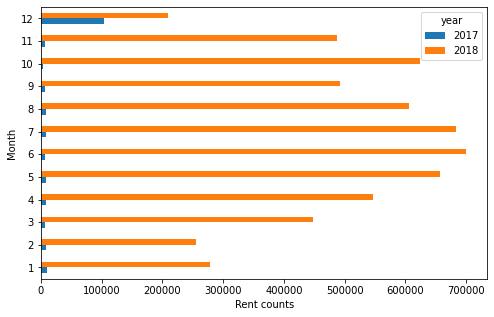

year,2017,2018
month,,
1,9539,277705
2,8523,255589
3,7222,447815
4,8729,547490
5,8307,657641
6,6669,700059
7,8549,682790
8,8032,606158
9,7233,492093


In [ ]:
#Month acc to year
pvt = pd.pivot_table(df,columns = 'year', index = 'month', aggfunc='sum', values='Rented Bike Count' )
print(pvt)

ax = pvt.plot(kind = 'barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 5)
# Change the axes labels
ax.set_xlabel("Rent counts")
ax.set_ylabel("Month")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
pvt

Here, we analysed the total bike rides according to given days and months regardless of the years. And to the surprise we can see that may, june, july, august, october has higher number of counts and we have a higher count wednesdays and saturdays recorded the lowest counts.




month       1      2      3       4   ...      9       10     11     12
weekday                               ...                              
0        39927  24299  43079   81653  ...   59191  100144  62767  46162
1        45433  53777  71949   47066  ...   49665  104585  82233  59167
2        46317  23322  73152   97150  ...   56913  109939  79098  18972
3        59387  38335  64990   70070  ...  101973   92384  78447  53270
4        37223  41225  63639  104951  ...   52656   40814  87815  51473
5        43700  17907  89419   88105  ...  110068   98637  58535  36892
6        15257  65247  48809   67224  ...   68860   80485  44517  45835

[7 rows x 12 columns]


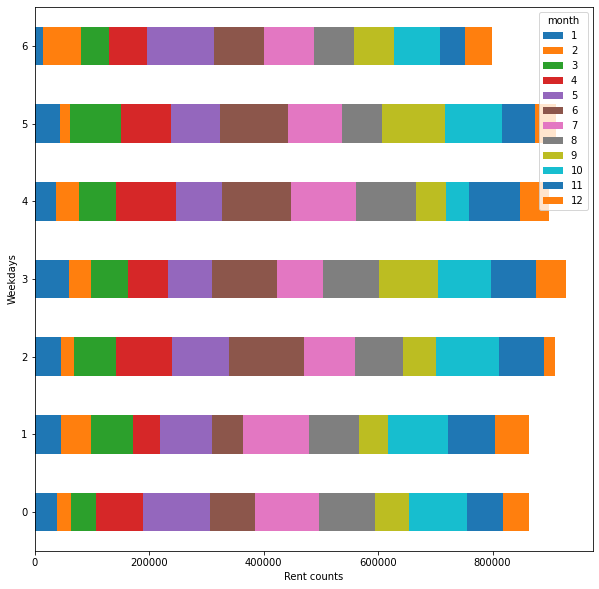

month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
0,39927,24299,43079,81653,118231,78432,110486,99192,59191,100144,62767,46162
1,45433,53777,71949,47066,91005,55105,114751,88141,49665,104585,82233,59167
2,46317,23322,73152,97150,99508,131041,90047,83412,56913,109939,79098,18972
3,59387,38335,64990,70070,77102,113762,80875,97672,101973,92384,78447,53270
4,37223,41225,63639,104951,79519,122219,112064,105368,52656,40814,87815,51473
5,43700,17907,89419,88105,84426,118614,95053,70119,110068,98637,58535,36892
6,15257,65247,48809,67224,116157,87555,88063,70286,68860,80485,44517,45835


In [ ]:
#Day acc to Month
pvt = pd.pivot_table(df,columns = 'month', index = 'weekday', aggfunc='sum', values='Rented Bike Count' )
print(pvt)

ax = pvt.plot(kind = 'barh', stacked = 'True')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Rent counts")
ax.set_ylabel("Weekdays")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
pvt

Categorical Variable coneversion (One hot encoding)


In [ ]:
df = pd.get_dummies(df, columns=['Seasons','Holiday','Functioning Day'], prefix=["season",'hol','fnc'])

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,weekday,day,season_Autumn,season_Spring,season_Summer,season_Winter,hol_Holiday,hol_No Holiday,fnc_No,fnc_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,3,12,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,3,12,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,3,12,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,3,12,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,3,12,0,0,0,1,0,1,0,1


Identitfying the independent and dependent variable

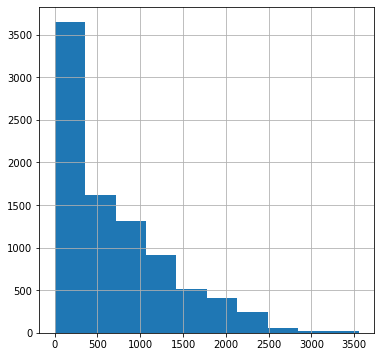

In [ ]:
df['Rented Bike Count'].hist(figsize=(6,6))

In [ ]:
#Y = df['Rented Bike Count']
# plotting the target variable to check its distribution
#Y.hist()

Dependent Variable(Rented Bike Count) seems to be rightly skewed, we need to change it to a Normal distribution.

Square Root Transformation


In [ ]:
import scipy.stats as stats
def plotvariale(df, Variable):
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  df[Variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[Variable], dist="norm", plot=plt)
  plt.show()


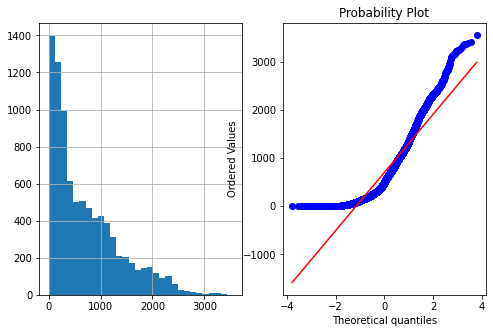

In [ ]:
plotvariale(df, 'Rented Bike Count')

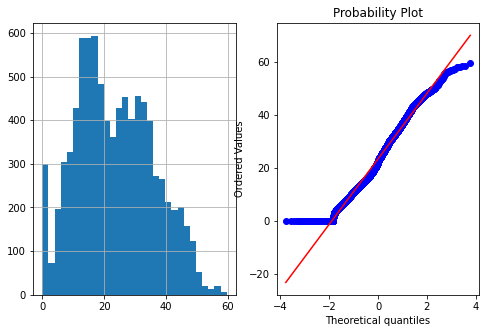

In [ ]:
df["Rented Bike Count"] = df["Rented Bike Count"] ** (1/2)
plotvariale(df, "Rented Bike Count")

* Our target variable, count is not normally distributed.
* Our target variable is right-skewed.
* For making it rightly skewed we used square root transformation

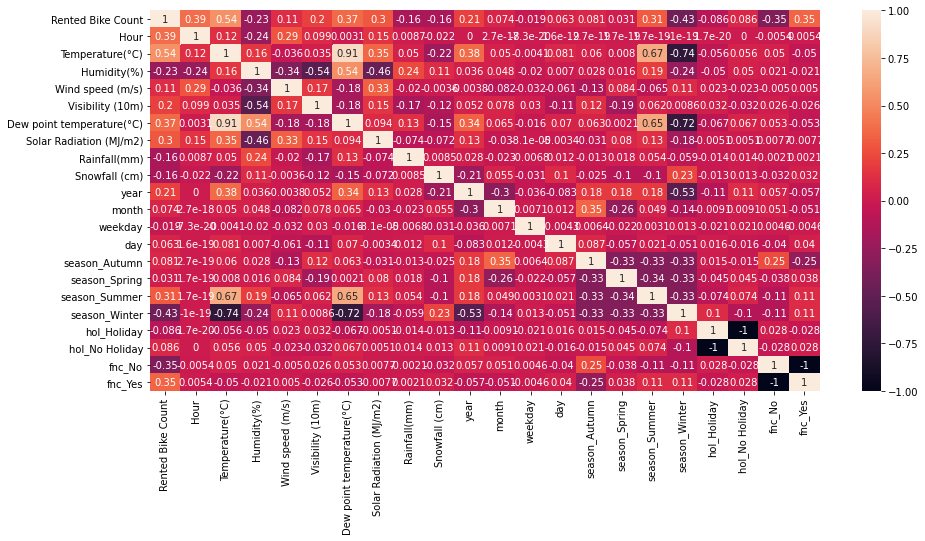

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})


1.self realtion i.e. of a feature to itself is equal to 1 as expected.
 
2. humidity is inversely related to Rented Bike Count as expected as the weather is humid people will not like to travel on a bike.


3. Also note that Rented Bike Count and holiday are highly inversely related as you would expect.

4. Also note that temp highly effects the Rented Bike Count. 

5. Also note that weather and Rented Bike Count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that  weather is getting more worse and so lesser people will rent bikes.

6. similarly we can draw some more inferences like weather and humidity and so on... .


In [ ]:
#corelation
df.corr()["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.539489
Hour                         0.390103
Dew point temperature(°C)    0.371053
fnc_Yes                      0.351511
season_Summer                0.311493
Solar Radiation (MJ/m2)      0.303047
year                         0.208522
Visibility (10m)             0.203959
Wind speed (m/s)             0.112176
hol_No Holiday               0.086258
season_Autumn                0.081034
month                        0.074064
day                          0.062536
season_Spring                0.031192
weekday                     -0.018900
hol_Holiday                 -0.086258
Snowfall (cm)               -0.155086
Rainfall(mm)                -0.163535
Humidity(%)                 -0.227313
fnc_No                      -0.351511
season_Winter               -0.426545
Name: Rented Bike Count, dtype: float64

In [ ]:
 #df.drop('Date',axis =1,inplace=True)

In [ ]:
#df.columns

In [ ]:
#df.drop('Dew point temperature(°C)', axis =1,inplace=True)

Now we drop a few variables like dew point temperature, rented bike count and date and consider all the other variables as 'X' as features and variable 'Y' as target variable as 'Rented Bike Counts'

In [ ]:
# Independent variable
X=df.drop(['Dew point temperature(°C)','Rented Bike Count','Date'], axis = 1, inplace = False)


In [ ]:
Y = df["Rented Bike Count"]

Multicolinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','season_Winter','season_Autumn','season_Summer','season_Spring','hol_Holiday','hol_No Holiday','fnc_Yes','Year','Humidity(%)']]])

,variables,VIF
0,Hour,4.188813
1,Temperature(°C),2.773733
2,Wind speed (m/s),4.832199
3,Visibility (10m),7.282510
4,Solar Radiation (MJ/m2),1.924505
5,Rainfall(mm),1.058657
6,Snowfall (cm),1.118874
7,year,20.304667
8,month,4.709232
9,weekday,3.294577


After having a careful VIF check, we tried to drop the values having high VIF values. So we dropped Rented Bike Count , Dew point temperature(°C) , year . Temperature is slightly higher but it is considered a very important part in bike rides.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','year']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Hour,1.211351
1,Temperature(°C),5.188875
2,Humidity(%),2.680056
3,Wind speed (m/s),1.305459
4,Visibility (10m),1.730240
5,Solar Radiation (MJ/m2),1.961804
6,Rainfall(mm),1.071850
7,Snowfall (cm),1.137642
8,month,1.222871
9,weekday,1.004545


In [ ]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

These are to understand which are the important features

In [ ]:
print(model.feature_importances_)

[0.25879589 0.14078043 0.11066727 0.0104963  0.02138798 0.04427052
 0.03740194 0.00211775 0.00129701 0.01370679 0.02155073 0.01463145
 0.00828852 0.01082044 0.00653051 0.13214652 0.00285581 0.00260404
 0.0779643  0.08168583]


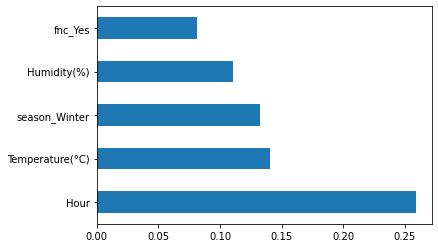

In [ ]:
#plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

***Linear regression***

We perform a linear regression using test train split. We split data in 80:20 with the defined random state to avoid any minimal changes after each run. Then further 80:20 is divided in test and train to get better accuracies.

In [ ]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values



Fitting regression line

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

Our regression Score:

In [ ]:
reg.score(X_train, y_train)

0.6543244139169364

We get a total of 20 coefficients.

In [ ]:
reg.coef_

array([ 4.88162427e-01,  4.70191991e-01, -1.62571725e-01,  1.18263548e-01,
        2.04376509e-04, -8.44119850e-01, -1.48190384e+00, -1.95255357e-02,
       -2.45177167e+00, -1.32353253e-02, -1.48823183e-01, -9.44019331e-03,
        3.68979855e+00,  6.80452090e-01,  9.13592050e-01, -5.28384269e+00,
       -1.50324985e+00,  1.50324985e+00, -1.42155663e+01,  1.42155663e+01])

In [ ]:
len(reg.coef_)

20

Regression Intercept

In [ ]:
reg.intercept_

4955.029897220611

Defining predicting variable :

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['accuracy'] = df['Predicted'] - df['Actual']

Calculating MSE, RMSE, R2 ad Adjusted R2

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 174539.8488427653
RMSE : 417.779665425168


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2,(y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5829619388349918
Adjusted R2 :  0.578143474812288


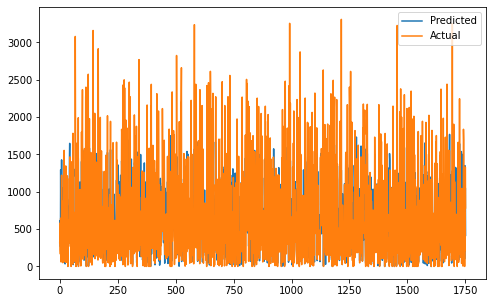

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Overall as a result we we are getting very low R2 score and adjusted R2 score. This means the actual and predicted are getting aligned very well. This does not seems to be a good model for this prediction.

***Lasso***

Performing a lasso regression while specifying hyperparameters like alpha value =  0.0001 and specifying maximum iterations as 7000. 

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 7000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=7000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso score and coefficients

In [ ]:
lasso.score(X_train, y_train)

0.6543244042116878

In [ ]:
lasso.coef_

array([ 4.88159351e-01,  4.70265071e-01, -1.62556006e-01,  1.18060852e-01,
        2.04629525e-04, -8.43882853e-01, -1.48181913e+00, -1.89484861e-02,
       -2.44763921e+00, -1.30503078e-02, -1.48778689e-01, -9.42365872e-03,
        5.85123410e+00,  2.84304526e+00,  3.07454368e+00, -3.11828964e+00,
       -3.00439466e+00,  2.64391916e-16, -2.84277438e+01,  8.08337998e-14])

Performing a grid search to get the best results.

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014], 'max_iter' :[50000,100000,150000,200000], 'tol' :[1,5,10]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=20)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014],
                         'max_iter': [50000, 100000, 150000, 200000],
                         'tol': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014],
                         'max_iter': [50000, 100000, 150000, 200000],
                         'tol': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

The best results of hyper parameters in terms of lasso regression.

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean absolute error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'max_iter': 50000, 'tol': 1}

Using  {'alpha': 0.01, 'max_iter': 50000, 'tol': 1}  the negative mean absolute error is:  -54.754059567657194


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

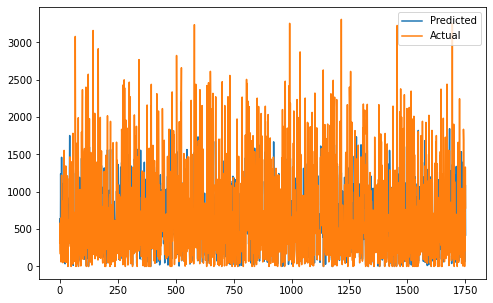

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso)**2)
plt.plot((np.array(y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#MSE of  test
MSE  = mean_squared_error((y_test)**2,(y_pred_lasso)**2)
print("MSE :" , MSE)

#RMSE of  test
RMSE = np.sqrt(MSE)
print("\nRMSE :" ,RMSE)
#R2 and adj R2 of test
r2 = r2_score((y_test)**2,(y_pred_lasso)**2)

print("\nR2 :" ,r2)
print("\nAdjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 178010.6940216586

RMSE : 421.91313563535635

R2 : 0.574668849585708

Adjusted R2 :  0.569754567085254


Overall in Lasso also R2 score is very low that 0.57. Seems like this is not the good model for such kind of predictions in this dataset.

***Ridge***

Performing Ridge regreesion, while specifying hyperparametersa using grid search.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.51341e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.56024e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.67514e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.65444e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.57466e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.62128644026324


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 174540.13391528276
RMSE : 417.78000660070217
R2 : 0.5829612576948926
Adjusted R2 :  0.5781427858022858


In ridge regression also we have not got good results, after checking the R2. Hence we choose a different set of model.

***Elastic Net***

Performing elastic net regression using grid search. Elastic net is combined version of ridge and lasso.

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.6110615847609348

In [ ]:
y_pred_en = elasticnet.predict(X_test)


In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_en)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_en)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 188000.6996782442
RMSE : 433.5904746165951
R2 : 0.5507991566893709
Adjusted R2 :  0.5456090833986645


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8],'max_iter' :[50000,100000,150000,200000], 'tol' :[1,5,10]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'max_iter': [50000, 100000, 150000, 200000],
                         'tol': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 50000, 'tol': 1}

Using  {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 50000, 'tol': 1}  the negative mean squared error is:  -54.68800302338775


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_elastic)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 178049.76885770942
RMSE : 421.95943982533373
R2 : 0.5745754858411246
Adjusted R2 :  0.5696601246145634


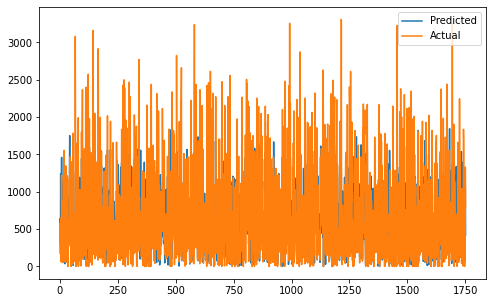

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic)**2)
plt.plot((np.array(y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In elastic net regression also we have not got good results, considering R2 score, hence it is not recommended and suitable for this dataset.

Decison Tree

After getting the results from linear regression and reguralization techniques, to make our model perfrom better we are trying few other algorithms. 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=4,                       
                           min_samples_split=5,
                           max_leaf_nodes=10)

In [ ]:
decision_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
model = decision_tree.fit(X_train,y_train) #drop date column to make this run because date cannot be interepreted as an integer.

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([13.22763073, 29.17533238, 16.05556048, ..., 13.22763073,
       27.11092225, 13.22763073])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test)**2, (y_pred_test)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 157655.52461655077
RMSE : 397.05859091140536


In [ ]:
decision_tree.fit(X_test,y_test)
print("R-Squared on test dataset={}".format(decision_tree.score(X_test,y_test)**2))

R-Squared on test dataset=0.49009985162534647


We can visualize the decision tree for a better understanding to know how the algorithm is performing on our dataset.

Decison Tree Visualization

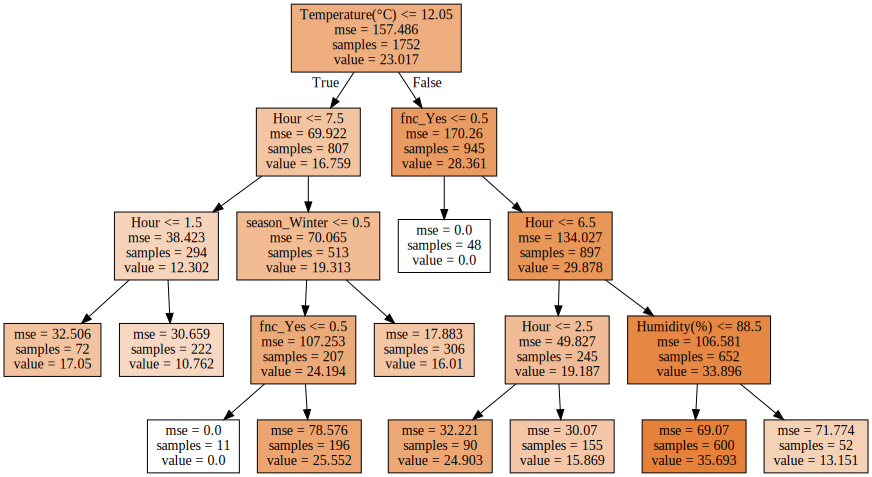

In [ ]:
# Visualizing the tree :
# Trying to get the picture of decison tree (Incomplete)
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=Y,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

Decion tree with any optimazation is not giving better results. It always perfroms better when an optimization techniques are used. 
We have used GridSearchCV as an optimazation technique.

3.Decison Tree - Hyperparameter tuning with GridSearchCV

In [ ]:
# Finding best parameters for decision tree
tree_regg = DecisionTreeRegressor(random_state=0)
tree_param = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(tree_regg,tree_param,cv=3)
grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
tree_regg =DecisionTreeRegressor(max_depth=best_param['max_depth'],min_samples_leaf= best_param['min_samples_leaf'])
model = tree_regg.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 56086.24227401238
RMSE : 236.8253412834285


In [ ]:
print("R-Squared on train dataset={}".format(tree_regg.score(X_train,y_train)**2))
print("R-Squared on test dataset={}".format(tree_regg.score(X_test,y_test)**2))

R-Squared on train dataset=0.8893485090990113
R-Squared on test dataset=0.7780086150185419


We can see that, Optimized decision tree gives us better result than that of normal decision tree.

4.Random Forest regressor with GridSearch CV


---




After using optimized decison tree we understood that it perfroms better rather than the normal one. So we are using optimized Random Forest to understand the performance results.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor.
forest = RandomForestRegressor()           
# n_estimators = number of trees in the foreset
n_estimators = [500]    

# max_features = max number of features considered for splitting a node:
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# # If “log2”, then max_features=log2(n_features).
max_features = ["auto",'sqrt','log2']

#applying grisd search on forest:
# Specify the grid serach params
grid_search_forest = {'n_estimators' : n_estimators, 'max_features' : max_features}
#grid search
rand_search_forest = GridSearchCV(forest, grid_search_forest, cv = 4, 
                                         refit = True, n_jobs = -1, verbose=2)

rand_search_forest.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
random_estimator = rand_search_forest.best_estimator_

y_pred_train= random_estimator.predict(X_train)

In [ ]:
rf_mse = mean_squared_error(y_train, y_pred_train)**2
rf_rmse = np.sqrt(rf_mse)**2
print("Mean_Square_error is : " ,rf_mse)
print("Root Mean_Square_error is : " ,rf_rmse)

Mean_Square_error is :  2.272473947304183
Root Mean_Square_error is :  2.272473947304183


In [ ]:
random_estimator = rand_search_forest.best_estimator_

y_pred_rf= random_estimator.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Mean_Square_error is : " ,rf_mse)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean_Square_error is : " ,rf_rmse)

Mean_Square_error is :  11.538167247863306
Root Mean_Square_error is :  3.396787783754426


In [ ]:
r2_score = (random_estimator.score(X_test,y_test)**2)
print("R Squared is : " ,r2_score)

R Squared is :  0.858838506200032


Up untill now Random Forest With Grid Search Cv is giving better results.

## **XgBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [ ]:
booster = xgb.XGBRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

booster_grid_search.fit(X_train,y_train )

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

[20:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

[20:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2, (y_pred_test)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 32736.62112883934
RMSE : 180.9326425188096


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2 = r2_score((y_test)**2, (y_pred_test)**2)
r2

0.9217805154800872

## **Random Forest With RandomizedSearchCV**





In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [ ]:
###Hyperparameters
n_estimators=[int(X) for X in np.linspace(start=100, stop=600, num=5)]
print(n_estimators)

[100, 225, 350, 475, 600]


In [ ]:
# Randomized Search Cv

# Numbers of trees in random forest 
n_estimators = [int(X) for X in np.linspace(start=100, stop=600, num=5)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum numbers of level in tree
max_depth =[int(x) for x in np.linspace(10, 20, num = 60)]
#max_depth.append(None)
# Minimum number of sample required to split a node
min_sample_split = [2, 5, 10, 15, 100]
# Minimum number  of samples required at each leaf node
#min_sample_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV is preety much fast. It help us to find out the best parameters out of this considering that how many n_estimators there, how many max feature should be there, max depth to be there. 

In [ ]:
# Create random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_sample_split}
               

print(random_grid)

{'n_estimators': [100, 225, 350, 475, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20], 'min_samples_split': [2, 5, 10, 15, 100]}


In [ ]:
# Use the Random grid to search for the best parameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#applying RandomSearch CV
rf_random = RandomizedSearchCV( estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12, total=   2.2s
[CV] n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12, total=   2.2s
[CV] n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12 
[CV]  n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12, total=   2.2s
[CV] n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12 
[CV]  n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12, total=   2.2s
[CV] n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12 
[CV]  n_estimators=100, min_samples_split=10, max_features=auto, max_depth=12, total=   2.3s
[CV] n_estimators=600, min_samples_split=15, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=15, max_features=sqrt, max_depth=14, total=   4.2s
[CV] n_estimators=600, min_samples_split=15, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=15, max_features=sqrt, max_depth=14, total=   4.1s
[CV] n_estimators=600, min_samples_split=15, max_fea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction=rf_random.predict(X_test)

In [ ]:
prediction

array([16.95053455, 23.47323042, 19.05364466, ..., 20.856207  ,
       35.64808644, 25.55426383])

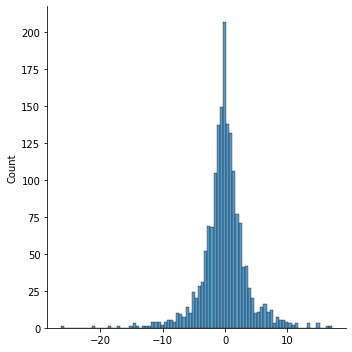

In [ ]:
sns.displot(y_test-prediction)

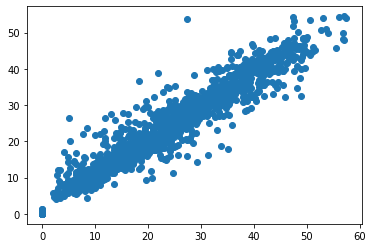

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
# Predicting the Test set results
y_pred = rf_random.predict(X_test)
x_train = rf_random.predict(X_train)

In [ ]:
y_pred

array([16.95053455, 23.47323042, 19.05364466, ..., 20.856207  ,
       35.64808644, 25.55426383])

In [ ]:
x_train

array([19.64258945, 53.60928834, 27.15321099, ..., 32.29173129,
       20.20450796, 21.18915014])

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 42822.78539438874
RMSE : 206.93667000893953


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8976810653099099
Adjusted R2 :  0.8964988708016477


Model evaluation

We are using R2 score to evaluate the models used to know which model performs better.

In [ ]:
data = {'Algorithms':['Linear Regression', 'Decision Tree GS','Random Forest RS','XGBoost'],
        'R2 Score':[0.5829619388349918,  0.7780086150185419, 0.8976810653099099,0.9217805154800872]}

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df

,Algorithms,R2 Score
0,Linear Regression,0.582962
1,Decision Tree GS,0.778009
2,Random Forest RS,0.897681
3,XGBoost,0.921781


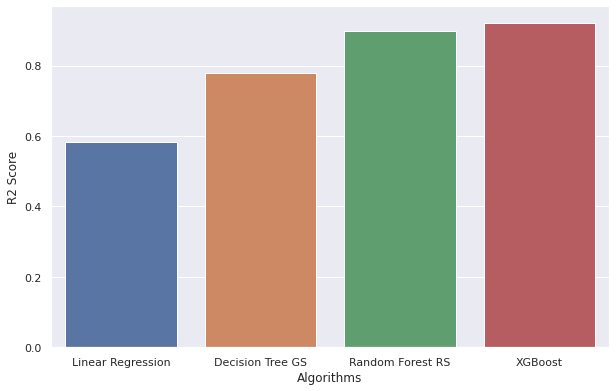

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6.27)})
sns.barplot(x = "Algorithms", y = "R2 Score", data=df)

From the above model evaluation, it is clear that XGBoost algorithm gives us the best perfomance followed by optimized algorithm.

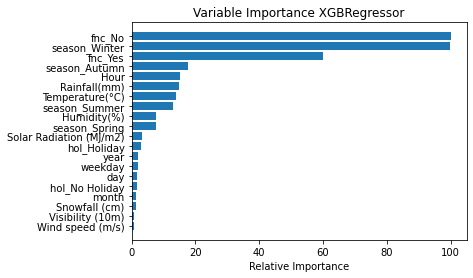

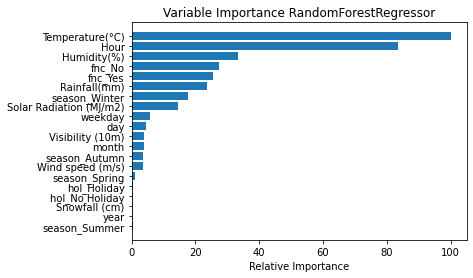

In [ ]:
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
    
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
    

    """
    

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

plot_importance(booster)
plot_importance(rf)

Conclusion:

1) After trying several algorithms, random forest and XG boost provided great results and proved to be very informative algorithms. Out of these two, XG boost is slightly better than random forest algorithm with a slight difference of 0.3 R2 score.